# MALDI acquisition of predefined areas

author: Alex Mattausch  
version: 0.1.0

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import remote_control.control as rc
import remote_control.utils as utils

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg')

from remote_control import acquisition
from remote_control.control import configure_fly_at_fixed_z
from itertools import product

CONFIG_FN = 'remote_config.json'

### IN CASE OF ERROR, make sure Jupyter is set to use the "Python [conda env:maldi-control-notebooks]" kernel

In [ ]:
qa = acquisition.QueueAquisition(
    config_fn = CONFIG_FN, 
    datadir="./data" # will save spatial position file here
)

In [3]:
# For plates with recessed wells, configure this to move the slide away when moving between wells.
# If the stage needs to move in the X/Y plane more than "distance", it will move the stage's Z axis
# to the value of the "z" parameter. 
# configure_fly_at_fixed_z(distance=2000, z=3000) # Enable
configure_fly_at_fixed_z(distance=None, z=None) # Disable

### 1. Define slide area

In [4]:
# Set up safety bounds (optional - comment this out if they're unwanted)
qa.set_image_bounds(
    min_x=-15000,
    max_x=15000,
    min_y=-25000,
    max_y=25000,
)

### 2. Add acquisition areas

Run this cell to clear areas and start over:

In [5]:
qa.clear_areas()

In [6]:
qa.add_area(
    name="well_1", # <- Optional!
    line_start=(-10649, -18704, 3444),
    line_end=(-4149, -18704, 3444),
    perpendicular=(-9399, -24204, 3444),
    step_size_x=500,
    step_size_y=1000
)

AcquistionArea(name=&#39;well_1&#39;, res_x=13, res_y=6, n_acquisitions=78)

In [7]:
qa.add_area(
    name="well_2",
    line_start=(-10729, -6580, 3444),
    line_end=(-8229, -6580, 3444),
    perpendicular=(-9479, -9080, 3444),
    step_size_x=25,
    step_size_y=25
)

AcquistionArea(name=&#39;well_2&#39;, res_x=100, res_y=100, n_acquisitions=10000)

In [8]:
qa.add_area(
    name="well_4",
    line_start=(-10729, 22000, 3444),
    line_end=(-8229, 22000, 3444),
    perpendicular=(-9479, 18000, 3444),
    step_size_x=250,
    step_size_y=250
)

AcquistionArea(name=&#39;well_4&#39;, res_x=10, res_y=16, n_acquisitions=160)

total areas: 3


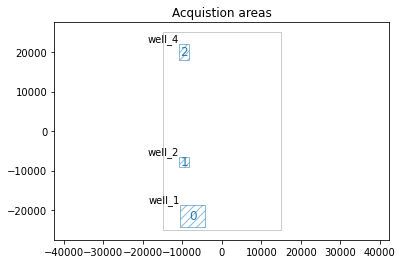

In [9]:
qa.plot_areas()

**NOTE:** numbers in boxes indicate acquisition order!

### 3. Generate measurement positions from areas

In [10]:
qa.generate_targets()

total pixels:  10238


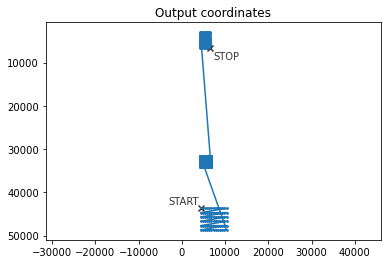

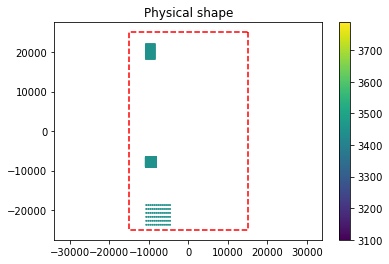

In [11]:
plt.close('all')
qa.plot_targets(annotate=True) 

### 4. Run acquistion

Once you are happy with plots above:
- Launch Telnet in apsmaldi software
- Press START on TUNE somputer
- Run the following cell

In [ ]:
OUTPUT_DIR = 'D:\\imagingMS\\2021_08\\your name\\'
IMZML_PREFIX = OUTPUT_DIR + '01052019_Mouse_DHB_pos_mz200-800_px50x50_LR'

qa.acquire(
    filename=IMZML_PREFIX, # Prefix for output coordinates file used in ImzML conversion
    dummy=True, # False - send commands to MALDI, True - don't connect, just print commands
    measure=False, # False - move stage only, True - move stage & acquire data
    email_on_success='test@example.com', # Set to None to suppress
    email_on_failure='test@example.com',  # Set to None to suppress
)

In [122]:
# uncomment first!
# ga.acquire(filename, dummy=False, measure=True)

### 5. Cleanup
After imaging run the following cell to terminate Telnet

In [ ]:
import remote_control.control as rc
rc.close(quit=True)